### Predicting Stock Market Prices using Regression

First let´s import the libraries and the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

If you are using Linux/Mac, you can download the data using the cell below. On Windows, it´s recommended to download the data manually, save it in the same folder as this .ipnyb file, and skipping directly to cell 3 

In [2]:
!wget https://raw.githubusercontent.com/egrochos/DevNetCreate2019/master/stock_index_price.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


Now that the data is imported, let´s load it into a DataFrame

In [3]:
dataset = pd.read_csv('stock_index_price.csv')
print(dataset.shape)
dataset.head()

(24, 5)


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


### Data Exploration

Let´s see how both "Interest Rate" and "Unemployment Rate" impact the stock index price (Interest Rate in red, Unemployment Rate in green)

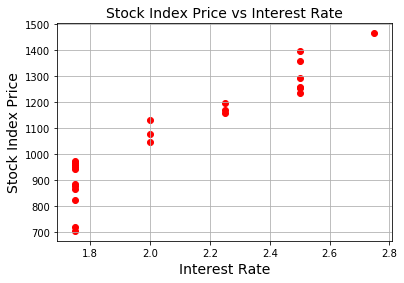

In [4]:
plt.scatter(dataset['Interest_Rate'],dataset['Stock_Index_Price'],color='red')
plt.title('Stock Index Price vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

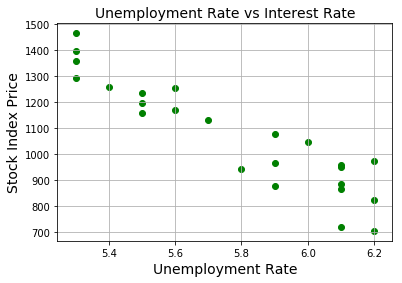

In [5]:
plt.scatter(dataset['Unemployment_Rate'],dataset['Stock_Index_Price'],color='green')
plt.title('Unemployment Rate vs Interest Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

We can also print a 3 dimension graph, to better visualize how these rates impact the stock price index

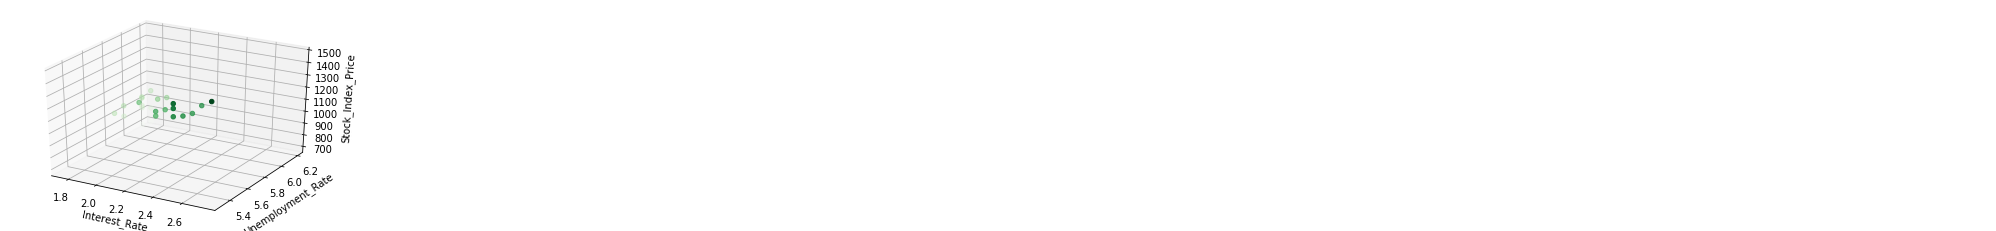

In [6]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = dataset['Interest_Rate'].values

ys = dataset['Unemployment_Rate'].values

zs = dataset['Stock_Index_Price'].values

ax = plt.axes(projection='3d')
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.scatter3D(xs, ys, zs, c=zs, cmap='Greens');

### Feature selection

Now, let´s prepare the data we are going to use to train the model. First, we save the values for both interest and unemployment rates to variable "x"

In [7]:
x = dataset.iloc[:, 2:4].values
print(x)
print(type(x))
print(x.shape)

[[2.75 5.3 ]
 [2.5  5.3 ]
 [2.5  5.3 ]
 [2.5  5.3 ]
 [2.5  5.4 ]
 [2.5  5.6 ]
 [2.5  5.5 ]
 [2.25 5.5 ]
 [2.25 5.5 ]
 [2.25 5.6 ]
 [2.   5.7 ]
 [2.   5.9 ]
 [2.   6.  ]
 [1.75 5.9 ]
 [1.75 5.8 ]
 [1.75 6.1 ]
 [1.75 6.2 ]
 [1.75 6.1 ]
 [1.75 6.1 ]
 [1.75 6.1 ]
 [1.75 5.9 ]
 [1.75 6.2 ]
 [1.75 6.2 ]
 [1.75 6.1 ]]
<class 'numpy.ndarray'>
(24, 2)


And we save the label (value we want to predict, in our case, stock price index) to a variable called "y"

In [8]:
y = dataset.iloc[:, 4].values
print(y)
print(type(y))
print(y.shape)

[1464 1394 1357 1293 1256 1254 1234 1195 1159 1167 1130 1075 1047  965
  943  958  971  949  884  866  876  822  704  719]
<class 'numpy.ndarray'>
(24,)


### Train the model

Now that our data is ready, let´s use sklearn to train a Linear Regression model

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [10]:
model = lm.fit(x,y)

We can print the values of both the intercept and the coefficients

In [11]:
beta = model.coef_
print(beta)

[ 345.54008701 -250.14657137]


In [12]:
beta_0 = model.intercept_
print(beta_0)

1798.4039776258546


### Prediction time

And finally, now that our model is trained, we can use it to predict the stock price index for two arbitrary interest and unemployment rates

In [13]:
New_Interest_Rate = 2.8
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', model.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1440.139393]
